# Python: A very brief tour

## David B. Pengra

Everything I know about Python I've learned from reading about it and trying stuff out.  You can do this too. I recommend the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

Below, I give some examples of aspects of Python as a language and a look at some basic tasks done with **NumPy**, **Matplotlib** and **LMFit** packages.


### In Python, everything is an "object"

That means everything has a **type**, has additional data called **attributes** and internal functions called **methods**.  You can see what these are with the `type()`, `help()` and `dir()` functions.

In [1]:
a = -35.4

In [2]:
type(a)

float

In [3]:
# is_integer() is a Boolean method that retirns true if the floating point number 
# could be replaced with an integer without loss of precision.
#
a.is_integer()

False

### Variables are pointers

But, most basic types are "immutable" so you can't tell.  Immutable means it cannot be changed, so if you try to change it, what you really do is reassign the variable to point to a new object.  

In [4]:
b = a
print(b)

-35.4


In [5]:
a = 5
print(a)
print(b)

5
-35.4


### But...

"Mutable" types can change their contents.  The variable "pointer" points to the structure, not the contents of the mutable structure.  This is most relevant with lists. 

In [6]:
numbers = [1,2,3,4,5,6,7,8, 9.5]
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9.5]

In [7]:
a = numbers
b = a
print("a =", a)
print("b =", b)

a = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]


In [8]:
b[0] = 10
print("a =", a)
print("b =", b)
print("numbers =", numbers)

a = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]
numbers = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]


To save the list no a new variable that will not affect the old list, use the copy() method

In [9]:
numbers = [1,2,3,4,5,6,7,8, 9.5]
a = numbers.copy()
b = a
b[0] = 56.2
print("a =", a)
print("b =", b)
print("numbers =", numbers)

a = [56.2, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [56.2, 2, 3, 4, 5, 6, 7, 8, 9.5]
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]


### The real action is in Python packages

Every notebook will include **NumPy** and **Matplotlib**

In [10]:
# Usually import packages via a handle to the functions in them using import ... as ...
#
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc
%matplotlib inline

A NumPy array is really useful. Compare similar operations with the original list.  Numpy arrays allow you to change every element of an array as easily as changing a single vaule.

In [11]:
c = np.array(numbers)
c

array([1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. , 9.5])

In [12]:
numbers[0] = 15.0
print(numbers)
print(c)

[15.0, 2, 3, 4, 5, 6, 7, 8, 9.5]
[1.  2.  3.  4.  5.  6.  7.  8.  9.5]


In [13]:
d = c.view()
d[0] = 25.0
print(c)
print(d)

[25.   2.   3.   4.   5.   6.   7.   8.   9.5]
[25.   2.   3.   4.   5.   6.   7.   8.   9.5]


In [14]:
type(c)

numpy.ndarray

In [15]:
print("numbers * 2 = ", numbers * 2)
print("c ** 2 =", c ** 2)

numbers * 2 =  [15.0, 2, 3, 4, 5, 6, 7, 8, 9.5, 15.0, 2, 3, 4, 5, 6, 7, 8, 9.5]
c ** 2 = [625.     4.     9.    16.    25.    36.    49.    64.    90.25]


Mathematical operations on lists concern concatinations, and in order to work, the operands must be lists.

In [16]:
print("c + 2 =", c + 2)
print("numbers + 2 = ", numbers + 2)

c + 2 = [27.   4.   5.   6.   7.   8.   9.  10.  11.5]


TypeError: can only concatenate list (not "int") to list

NumPy functions will often convert numerical lists into NumPy arrays automatically.

In [17]:
print("sin(c) =", np.sin(c))
print("sin(numbers) =", np.sin(numbers))

sin(c) = [-0.13235175  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825 -0.07515112]
sin(numbers) = [ 0.65028784  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825 -0.07515112]


Look at all of the methods inside a NumPy array!

In [ ]:
help(c)

## Get data into the notebook

There are many ways to enter data for analysis:

1. **Create arrays directly.** This is the quickest if you do not have any computer files (spreadsheets or text files) with the data set you want to analyze already.  But it is the least flexible.  Your life will be easier if you adopt one of the following methods.
2. **Read a text file with `np.loadtxt()`.**  This is a relatively simple function that will read in a single "Comma Separated Value" (CSV) file and store its contents into NumPy arrays.
3. **Read in a CSV file with `pd.read_csv()`.** This works similarly to **loadtxt()** but it is more forgiving of mixed data types.  It also creates a Pandas DataFrame rather than a NumPy array.
4. **Read an Excel file with `pd.read_excel()`.** The Pandas library has some very powerful and easy to use function that can swallow a whole multi-worksheet Excel file in one call.  It makes a Python "dictionary" (type is `dict`) of Pandas DataFrames, with each DataFrame being one Excel sheet.

Here are some examples using experimental data from the optics lab on Snell's law of refraction.

### Method 1: Enter data directly

Pay close attention to the syntax in the following statements.

In [19]:
# This will create two NumPy arrays
theta_inc = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0])
theta_refr = np.array([6.8, 13.3, 19.5, 25.4, 31.0, 35.5, 39.3, 41.5])

### Method 2: read in a CSV file with `np.loadtxt()`

You should study the documentation of any NumPy function that you use.  That is how will learn to solve more challenging coding problems.

In [20]:
# "skiprows" jumps over the row with the column headings.
# The default delimiter is a space, by a CSV file uses commas
#
# YOU NEED TO HAVE A CSV DATA FILE TO RUN THIS
#
SL_data = np.loadtxt("snells_law_data.csv",delimiter=',',skiprows=1)
SL_data # This prints out a default listing of what is read in, in this case, a 2d array.

array([[10. ,  6.8,  5. ,  8.2],
       [20. , 13.3, 10. , 15.3],
       [30. , 19.5, 15. , 23.3],
       [40. , 25.4, 20. , 31. ],
       [50. , 31. , 25. , 39.1],
       [60. , 35.5, 30. , 48.5],
       [70. , 39.3, 35. , 59. ],
       [80. , 41.5, 40. , 74. ]])

In [21]:
# Extract columns of the of the 2d array.  
theta_inc = SL_data[:,0]
theta_refr = SL_data[:,1]
print(theta_inc)

[10. 20. 30. 40. 50. 60. 70. 80.]


### Method 3: read in a CSV file with `pd.read_csv()`

The data structure returned from this is more complex.  It is a Pandas "DataFrame."  Each DataFrame is like a 2D array, but the data type of the whole DataFrame is not fixed to one type, unlike for NumPy arrays.  But the command is very easy to use.

In [22]:
# First, import the Pandas package
import pandas as pd

# YOU NEED TO HAVE A CSV DATA FILE TO RUN THIS
#
SL_df = pd.read_csv("snells_law_data.csv")
SL_df # Notice the nice formatting of the data table

,theta_inc,theta_refr,theta_i_rev,theta_r_rev
0,10,6.8,5,8.2
1,20,13.3,10,15.3
2,30,19.5,15,23.3
3,40,25.4,20,31.0
4,50,31.0,25,39.1
5,60,35.5,30,48.5
6,70,39.3,35,59.0
7,80,41.5,40,74.0


In [23]:
# Columns may be directly accessed as follows
SL_df['theta_inc']

0    10
1    20
2    30
3    40
4    50
5    60
6    70
7    80
Name: theta_inc, dtype: int64

### Method 4: read in an Excel file with `pd.read_excel()`

This is useful if you have a lot of data in multi-worksheet spreadsheet file that you would like to import all at once.  It creates Python "dict" (a.k.a. "dictionary") whose entries are Pandas "DataFrames".  Notice the code below that will print each worksheet.

In [24]:
# "sheet_name" allows you to specify which sheet to read in.  Setting it to "None"
#     reads in all sheets
#
# YOU NEED TO HAVE An EXCEL (.xlsx) DATA FILE TO RUN THIS
#
Lenses_data = pd.read_excel("Lenses_lab_data.xlsx", sheet_name=None)
for item in Lenses_data:
    print('Sheet name: ',item)
    print(Lenses_data[item])

Sheet name:  snells_law_data
   theta_inc  theta_refr  theta_i_rev  theta_r_rev
0         10         6.8            5          8.2
1         20        13.3           10         15.3
2         30        19.5           15         23.3
3         40        25.4           20         31.0
4         50        31.0           25         39.1
5         60        35.5           30         48.5
6         70        39.3           35         59.0
7         80        41.5           40         74.0
Sheet name:  Gauss_lens_law_data
    x_lens  x_img  y_obj  y_img
0     24.5   60.0      5   19.0
1     25.0   55.3      5   15.5
2     26.0   49.3     15   32.0
3     27.0   47.0     15   25.0
4     29.0   45.0     15   17.0
5     30.0   44.9     15   15.5
6     32.0   45.2     15   12.0
7     34.0   46.3     15    9.5
8     37.0   48.3     15    7.5
9     40.0   50.6     15    6.0
10    50.0   59.4     15    4.0


In [25]:
# Extract columns from the first worksheet (called 'snells_law_data').  

theta_inc = Lenses_data['snells_law_data']['theta_inc']
theta_refr = Lenses_data['snells_law_data']['theta_refr']

## A simple plot with a simple fit

Very basic - like Excel ***trendline***

First, plot the raw data.

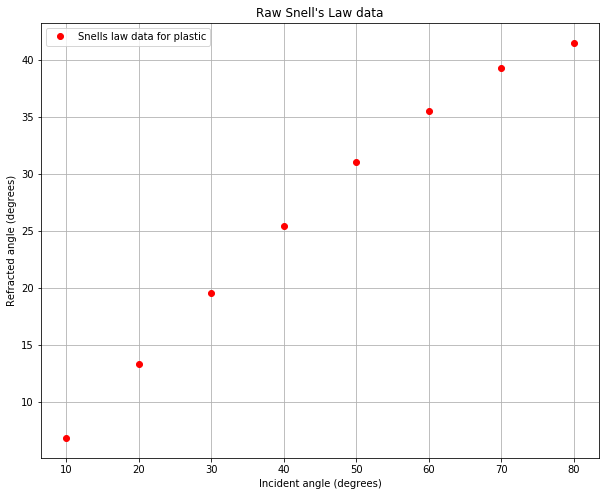

In [26]:
# Look at each line below.  What does each line do?
#
plt.figure(figsize=(10,8))
plt.plot(theta_inc,theta_refr,'ro',label="Snells law data for plastic")
plt.grid(True)
plt.xlabel('Incident angle (degrees)')
plt.ylabel('Refracted angle (degrees)')
plt.title("Raw Snell's Law data")
plt.legend();

Snell's law says that the ratio of the sines of the angles should be a constant dependent on the relative refractive indices.  So taking the sines should make a plot with a straight line.  

**Dont' forget!** The argument to an angular function must be in radians (almost always).

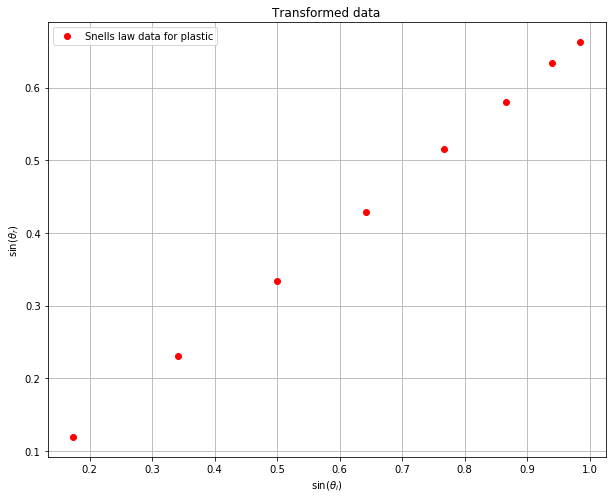

In [27]:
# Notice how you can take the sine of the whole array at once

sin_th_inc = np.sin((np.pi/180.0)*theta_inc)
sin_th_refr = np.sin((np.pi/180.0)*theta_refr)

# Now plot this:
plt.figure(figsize=(10,8))
plt.plot(sin_th_inc,sin_th_refr,'ro',label="Snells law data for plastic")
plt.grid(True)
plt.xlabel(r'$\sin(\theta_i)$')
plt.ylabel(r'$\sin(\theta_r)$')
plt.title("Transformed data")
plt.legend();

### Fit a line

Very basic.  Later we'll use something much more powerful.

In [28]:
# The first line does a fit, and returns the fitting coefficients
#
my_coeff = np.polyfit(sin_th_inc,sin_th_refr,1) # This fits a line (degree-1 polynomial)
#
print(my_coeff)
print('Intercept = {:.4f}'.format(my_coeff[1]))
print('Slope = {:.4f}'.format(my_coeff[0]))


[ 6.72098323e-01 -2.59084985e-04]
Intercept = -0.0003
Slope = 0.6721


In [29]:
# The poly1d function uses the coefficients and creates a function of them
#
cal = np.poly1d(my_coeff)  # This makes a polynomial function from the coefficients
print(np.poly1d(cal))


 
0.6721 x - 0.0002591


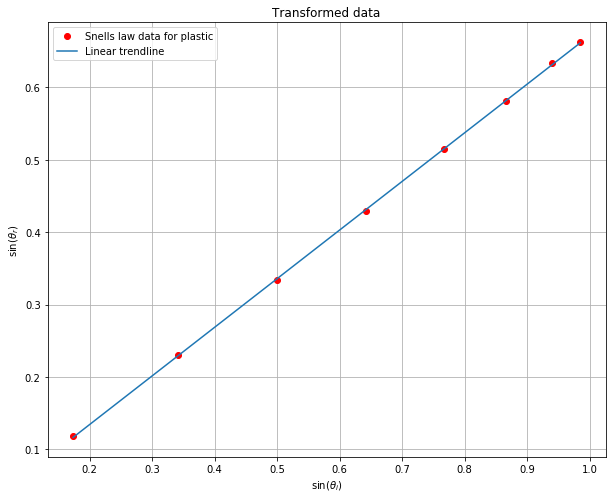

In [30]:
# Now we can add a fitline
#
plt.figure(figsize=(10,8))
plt.plot(sin_th_inc,sin_th_refr,'ro',label="Snells law data for plastic")
plt.plot(sin_th_inc,cal(sin_th_inc),'-',label="Linear trendline")
plt.grid(True)
plt.xlabel(r'$\sin(\theta_i)$')
plt.ylabel(r'$\sin(\theta_r)$')
plt.title("Transformed data")
plt.legend();


### Another example from optics lab - Michelson Na fringe-contrast nodes

In the Michelson experiment, the interferometer pattern from a sodium discharge lamp shows bright yellow fringes.  The fringes come from the interference of light from two closely-spaced yellow emission lines. This pattern is strongest and clearest when the path length difference along the two beam arms is zero.  But as one mirror is moved with respect to the other, the fringes go through nodes and antinodes of contrast.  when the fringes are clearest, that is an antinode; when the fringes are most faint, that is a node.  The spacing of the nodes is inversely proportional to the wavenumber difference between the two lines.  

Readings of the node positions are from a micrometer position of points that should be linearly spaced.  The average spacing is found by a line fit.

In [31]:
# Node locations, using extreme limits of where nodes might be, i.e., as far as I can tell
# the first node lies between 15.354 and 15.243 mm.
#
Na_nodes_data = np.array([
    [15.354,15.243],
    [15.611,15.563],
    [15.925,15.856],
    [16.214,16.148],
    [16.485,16.452],
    [16.764,16.748],
    [17.042,17.049],
    [17.335,17.343],
    [17.617,17.643],
    [17.903,17.939],
    [18.178,18.233],
    [18.481,18.534],
    [18.778,18.824]])

To understand the statement below, you need to learn how indexing works in Python.  See **The Whirlwind Tour** (link at top) for more information.

In [32]:
# Find the midpoints of the above pairs
#
Na_nodes = (Na_nodes_data[:,0]+Na_nodes_data[:,1])/2.0
print(Na_nodes)

[15.2985 15.587  15.8905 16.181  16.4685 16.756  17.0455 17.339  17.63
 17.921  18.2055 18.5075 18.801 ]


In [33]:
# Assign a number to each node.  But want the center node to be 0
# The size attribute gives the number of elements in the array.

node_num = np.arange(Na_nodes.size)-Na_nodes.size//2
node_num

array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6])

### Make a plot

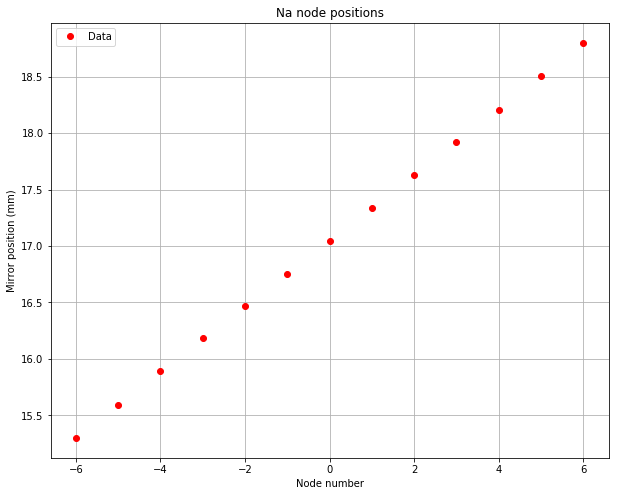

In [34]:
plt.figure(figsize=(10,8))
plt.plot(node_num,Na_nodes,'ro',label="Data")
plt.grid(True)
plt.xlabel('Node number')
plt.ylabel('Mirror position (mm)')
plt.title('Na node positions')
plt.legend();

## Fit a line using LMFit

LMFit is a very powerful line fitting package that does an especially good job handing data and fit uncertainties.  You should get used to using it because even though running a simple line fit is a little bit more complicated than what is shown above, you can also run much more elaborate fits by making only a few adjustments to the basic procedure.

### Models: the basis of LMFit

LMFit provides a large number of pre-made model functions with predefined parameters. 

To **call a pre-made model**, use:

- `from lmfit.models import ModelFromList` 

where `ModelFromList` may be one or more of the following.  The actual functions and the names of the parameters are also given below.

  - `LinearModel()`
     - $f(x;m,b)=mx+b$
     - m is called 'slope';  b= 'intercept'
  - `QuadraticModel()`
     - $f(x;a,b,c)=ax^2+bx+c$
     - parameters called 'a', 'b', 'c'
  - `PolynomialModel(N)`	polynomial of order N
     - $f(x,;c_0,c_1,c_2,…c_N)=c_0+c_1 x+c_2 x^2+⋯+c_N x^N$
     - parameters called c0, c1, c2, … cN

Think of this as bringing in these as the equivalent of a user-defined function.  To have more than one, you would use:

- `from lmfit.models import LinearModel, QuadraticModel`

There are many more models available, such as peaks, power-law, and logarithmic functions, etc. You can also create and use your own model.  To see examples of these see the extensive examples created by Prof. Olmstead in another notebook.

Then you must creat an instance of the model that has been imported:

- `line0 = LinearModel()` to fit a line to your data

To run the fit, you must first establish starting points for the fit parameters.  For line, polynomials and other realtively simple functions, there is an additional method in the model called `guess()`.  To use this, create parameters with starting values by this line:

- `param_guess = line0.guess(ydata, x=xdata)` where `ydata` is the y-value array and `xdata` is the x-value array. 

Then, to run the fit, you invoke the `fit()` method in the model, and save the results into a **Parameters** object:

- `line_fit0 = line0.fit(ydata, param_guess, x=xdata)` makes the fit and saves the results.

Finally to obtain the values of the parameters, information about how good the fit was, and to make a plot of the fit and data, run the `fit_report()` and `plot()` methods:

- `print(line_fit0.fit_report())` to print out the fit results.
- `line_fit0.plot()` to make a quick plot.

Here is everything needed to do this on the data treated above:

In [35]:
# Import the model.
# You only do this once in a notebook
from lmfit.models import LinearModel

In [36]:
# Make an instance of the model
line0 = LinearModel()

# Create the parameters and guess their starting values
param_guess = line0.guess(Na_nodes, x=node_num)

# Fit the line, and print the results
line_fit0 = line0.fit(Na_nodes, param_guess, x=node_num)
line_fit0

### Include uncertainties (error bars) 

LMFit can easily handle uncertainties in the data set to weight the fit.  From above, we have ranges of where the notes may lie from half the range of each node location.  We can use these to improve our knowledge of the fit quality.

In [37]:
# Find the uncertainty in the node locations from the ranges
#
Na_nodes_unc = abs(Na_nodes_data[:,0]-Na_nodes_data[:,1])/2.0
print(Na_nodes_unc)

[0.0555 0.024  0.0345 0.033  0.0165 0.008  0.0035 0.004  0.013  0.018
 0.0275 0.0265 0.023 ]


Now modify the `fit()` call with a `weights` array equal to the inverse of the uncertanity.

In [38]:
# Fit the line, and print the results with weights
line_fit1 = line0.fit(Na_nodes, param_guess, x=node_num, weights=1/Na_nodes_unc)
line_fit1

Finally, make a plot.

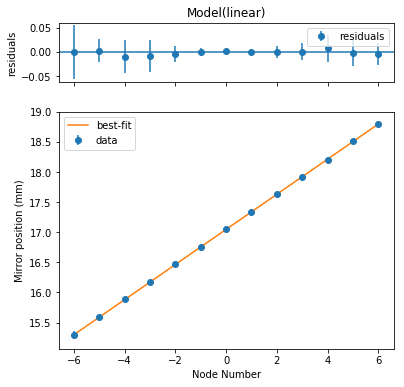

In [39]:
line_fit1.plot()
plt.xlabel('Node Number')
plt.ylabel('Mirror position (mm)');

Notice that if you do not include the weights, you do not get error bars on the plot.  `line_fit0` did not include weights:

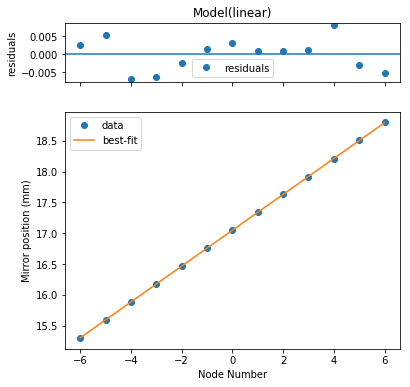

In [40]:
line_fit0.plot()
plt.xlabel('Node Number')
plt.ylabel('Mirror position (mm)');